In [8]:
%load_ext autoreload
%autoreload 2

from openAIgym.experimenter import *
from openAIgym.data_extractor import *
import gym
import xgboost

from sklearn.multioutput import MultiOutputRegressor
number_of_runs = 10

env = gym.make('LunarLander-v2')
de = DataExtractor(env,get_real_obs_for_luner_lander,RandomLunarAgent())
cache_de = CachingExtractorDecorator(de)

regressor1 = xgboost.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 100)
multi_regressor1 = MultiOutputRegressor(regressor1)
e1 = ExperimenterRunner(multi_regressor1,cache_de)
e1.number_of_runs = number_of_runs

e1.compute_errors()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/amir/.local/share/virtualenvs/python-rQ1OrFAJ/lib/python3.9/site-packages/xgboost/data.py:119: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/amir/.local/share/virtualenvs/python-rQ1OrFAJ/lib/python3.9/site-packages/xgboost/data.py:119: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/amir/.local/share/virtualenvs/python-rQ1OrFAJ/lib/python3.9/site-packages/xgboost/data.py:119: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/amir/.local/share/virtualenvs/python-rQ1OrFAJ/lib/python3.9/site-packages/xgboost/data.py:119: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase 

/home/amir/.local/share/virtualenvs/python-rQ1OrFAJ/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/amir/.local/share/virtualenvs/python-rQ1OrFAJ/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


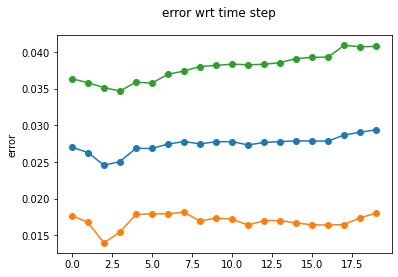

In [9]:
ExperimentPlotter(np.abs).plot_errors_for_state(e1.errors,e0,20)

In [11]:
e1.data

{0: (array([[10.035429  , 13.2975893 ,  0.89588922, ...,  0.        ,
           0.        ,  2.        ],
         [10.05235958, 13.27798176,  0.85866094, ...,  0.        ,
           0.        ,  3.        ],
         [10.07013035, 13.25431252,  0.91136903, ...,  0.        ,
           0.        ,  3.        ],
         ...,
         [ 7.99265432, 13.76258183, -3.77334094, ...,  0.        ,
           0.        ,  0.        ],
         [ 7.91744804, 13.74859333, -3.77334023, ...,  0.        ,
           0.        ,  3.        ],
         [ 7.842875  , 13.73077488, -3.73340034, ...,  0.        ,
           0.        ,  0.        ]]),
  array([[ 1.77135468e-02, -2.28633881e-02, -1.21194124e-03, ...,
           1.17994100e-03,  0.00000000e+00,  0.00000000e+00],
         [ 1.69305801e-02, -1.96075439e-02, -3.72282863e-02, ...,
          -1.94880217e-02,  0.00000000e+00,  0.00000000e+00],
         [ 1.77707672e-02, -2.36692429e-02,  5.27080894e-02, ...,
          -1.05649330e-01,  0.00000

In [14]:
train_dataX, train_dataY, test_dataX, test_dataY = e1.data[0]

In [18]:
train_dataY = [y[0] for y in train_dataY]
test_dataY = [y[0] for y in test_dataY]

In [21]:
r2 = xgboost.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 100)


In [22]:
r2.fit(train_dataX,train_dataY)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=32, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
predict = r2.predict(test_dataX)

In [41]:
np.mean(np.abs(predict - test_dataY))

0.04546386628122679

In [59]:
mean_absolute_error(test_dataY, predict)

0.04546386628122679

In [99]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score, KFold
from keras.models import Sequential
from sklearn.metrics import accuracy_score,mean_absolute_error
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

from numpy.random import seed
seed(1)
import random as rn
# Setting the seed for python random numbers
rn.seed(1254)

import tensorflow as tf
tf.random.set_seed(123)

def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=9, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


estimator = KerasRegressor(build_fn=baseline_model, epochs=10, batch_size=100, verbose=True, )

estimator.fit(train_dataX, np.array(train_dataY))

predictionT = estimator.predict(train_dataX)

prediction = estimator.predict(test_dataX)
mean_absolute_error(test_dataY, prediction), mean_absolute_error(train_dataY, predictionT)

Epoch 1/10
12/12 [==============================] - 0s 2ms/step - loss: 1.0634
Epoch 2/10
12/12 [==============================] - 0s 2ms/step - loss: 0.3091
Epoch 3/10
12/12 [==============================] - 0s 2ms/step - loss: 0.2031
Epoch 4/10
12/12 [==============================] - 0s 2ms/step - loss: 0.1402
Epoch 5/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0984
Epoch 6/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0825
Epoch 7/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0708
Epoch 8/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0631
Epoch 9/10
12/12 [==============================] - 0s 1ms/step - loss: 0.0570
Epoch 10/10
1/1 [==============================] - 0s 20ms/step


(0.39346764005463697, 0.17615713647341935)